#                          Predictive Analysis on HealthCare Problems

### Introduction: 
### In the current era, there are n number of diseases/illnesses due to stress, lack of physical activity, etc. Out of which, some of them are succeeding other illnesses. Based on this, we came across one major issue resulting in the highest number of deaths in the USA. According to the American Heart Association, 46% of US adults are estimated to have hypertension. On average, there are more than 4000 deaths each day due to heart diseases/stroke. This issue is due to Hypertension where results are more terrific. To understand in-depth we are providing in-depth analysis based on one of the HealthCare Datasets selected that contains information about certain patients, their age, etc.

### What are we trying to achieve? 
### Based on this analysis, we are looking forward to understanding what kind of patients are more prone to get a stroke in order to help the medical industry in improving heart treatments. Here, we are predicting the reasons and probability resulting in heart diseases. The prediction could help in the healthcare sector to provide better treatment to the patients as well as it will help us identify the main causes of the disease so it can be prevented. 

### Dataset Details

### Dependent Variables : Stroke
### Independent Variables : Age, ever_married, hypertension, avg_glucose, bmi, heart_disease 
### To understand the major cause for this, we are implementing 2 models which are General Linear Model and KNN, based on the business insights planned and comparing accuracy for better prediction.




In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
health= pd.read_csv('C:/Users/amaan/Desktop/IDS/healthcare.csv')

In [4]:
health

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [5]:
health.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [6]:
health['bmi'] = health['bmi'].fillna(health["bmi"].mean())

### For obtaining outliers, we have converted the categorical variables into numeric variables by assigning them certain numeric values. We found out that approx 1% outliers were observed in the “avg_glucose” and “bmi” column when performed by calculating through IQR i.e. Interquartile Range, which was dropped. The target variable taken here is “Stroke”, denoted by Probability Density.

### The left chart represents the relationship with “Age”. We can see that the age group between 70-80 is more likely to encounter stroke. Right chart showcases the relationship with “Hypertension” and it is observed that people having hypertension in the range of -0.25 to 0.25 are most likely to have a stroke.


Text(0, 0.5, 'Probability Density')

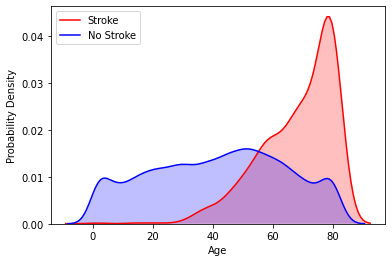

In [7]:
sns.kdeplot(health.loc[(health['stroke']==1), 
            'age'], color='r', shade=True, Label='Stroke') 
  
sns.kdeplot(health.loc[(health['stroke']==0),  
            'age'], color='b', shade=True, Label='No Stroke') 
  
plt.xlabel('Age') 
plt.ylabel('Probability Density') 

C:\Users\amaan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Probability Density')

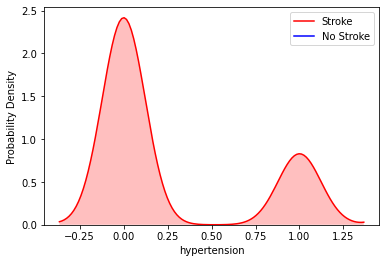

In [8]:
sns.kdeplot(health.loc[(health['stroke']==1), 
            'hypertension'], color='r', shade=True, Label='Stroke') 
  
sns.kdeplot(health.loc[(health['stroke']==0),  
            'hypertension'], color='b', shade=True, Label='No Stroke') 
  
plt.xlabel('hypertension') 
plt.ylabel('Probability Density') 

### Next relationship was made with the “Body Mass Index” and we observed that people with BMI range in between 20-40 have higher chances of acquiring stroke. Further when Stroke risk was compared with “sex”, we came to know that chances of getting stroke are higher in Males as compared to Females.

Text(0, 0.5, 'Probability Density')

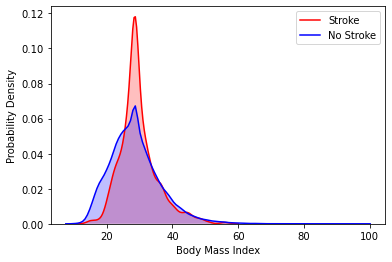

In [9]:
sns.kdeplot(health.loc[(health['stroke']==1), 
            'bmi'], color='r', shade=True, Label='Stroke') 
  
sns.kdeplot(health.loc[(health['stroke']==0),  
            'bmi'], color='b', shade=True, Label='No Stroke') 
  
plt.xlabel('Body Mass Index') 
plt.ylabel('Probability Density') 

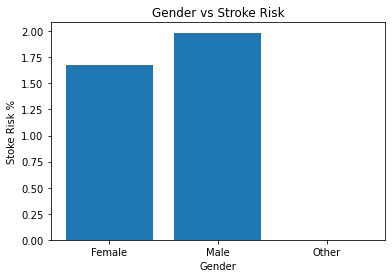

In [10]:
gender_group = health.groupby(['gender'], as_index=False)
gender_group_count = gender_group.count()['stroke']
gender_group_sum = gender_group.sum()['stroke']
gender_group_percentage = gender_group_sum / gender_group_count * 100
plt.bar(x=[0,1,2], height=gender_group_percentage, tick_label=['Female', 'Male', 'Other'])
plt.title("Gender vs Stroke Risk")
plt.xlabel("Gender")
plt.ylabel("Stoke Risk %")
plt.show()

### Lastly, when compared with the “Marital Status”, we realized that chances of married people to have strokes is greater than unmarried ones.

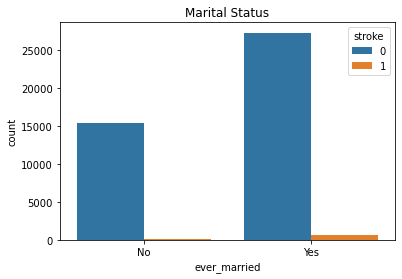

In [11]:
sns.countplot(x='ever_married', hue = 'stroke', data = health)
plt.title('Marital Status')
plt.show()

In [12]:
##### Handling categorical variables
############### Gender ########
for i in health['gender']:
    if i=='Male':
        health['gender']=1
    if i=='Female':
        health['gender']=2
    else:
        health['gender']=0
        
############## Residence_type
for i in health['Residence_type']:
    if i=='Rural':
        health['Residence_type']=1
    else:
        health['Residence_type']=0
############# Work Type
for i in health['work_type']:
    if i=='children':
        health['work_type']=0
    if i=='Private':
        health['work_type']=1
    if i=='Self-employed':
        health['work_type']=2
    if i=='Never_worked':
        health['work_type']=3
    else:
        health['work_type']=4
################# Ever Married
for i in health['ever_married']:
    if i=='No':
        health['ever_married']=1
    else:
        health['ever_married']=0

In [13]:
health.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,2,3.0,0,0,0,4,0,95.12,18.0,NaN,0
1,30468,2,58.0,1,0,0,4,0,87.96,39.2,never smoked,0
2,16523,2,8.0,0,0,0,4,0,110.89,17.6,NaN,0
3,56543,2,70.0,0,0,0,4,0,69.04,35.9,formerly smoked,0
4,46136,2,14.0,0,0,0,4,0,161.28,19.1,NaN,0


In [14]:
health_smoke = health.dropna(axis='rows') #drop NA vals

In [15]:
health_smoke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,2,58.0,1,0,0,4,0,87.96,39.2,never smoked,0
3,56543,2,70.0,0,0,0,4,0,69.04,35.9,formerly smoked,0
6,52800,2,52.0,0,0,0,4,0,77.59,17.7,formerly smoked,0
7,41413,2,75.0,0,1,0,4,0,243.53,27.0,never smoked,0
8,15266,2,32.0,0,0,0,4,0,77.67,32.3,smokes,0


In [ ]:
#health['smoking_status']=health['smoking_status'].fillna("") #Affects results bcz of huge data so another data, available data only 34% rest is unavailable so not a good idea

In [ ]:
#for i in health['smoking_status']:
 #   if i == "": 
  #      for j in health['age']:
   #         if j<=18:
    #            health['smoking_status']=='never smoked'
     #       elif j
        #elif health['age']>=60 and health['smoking_status'] == "":
         #   health['smoking_status']=='formerly smoked'
        #else:
         #   health['smoking_status']=='smokes'

In [ ]:
#for i in health['smoking_status']:
 #   if i == "":
  #      health['smoking_status']=='smokes'

In [ ]:
#health.head()

In [16]:
############ Again checking for null values
health_smoke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
health.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### With the help of correlation matrix we identified “avg_glucose”, ‘age’, “hypertension”, “heart_disease” and “ever_married” as major features of the dataset. 

### After performing the exploratory data analysis, we applied the General Linear Model and KNN model over our dataset. It came into notice that GLM gave 78.3% accuracy whereas KNN gave 98.28% accuracy.


In [18]:
health.corr(method='pearson') #correlation matrix--Learn 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
id,1.000000,NaN,0.012760,0.006571,0.009234,NaN,NaN,NaN,0.024634,0.018382,0.002976
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0.012760,NaN,1.000000,0.272169,0.250188,NaN,NaN,NaN,0.237627,0.352236,0.156049
hypertension,0.006571,NaN,0.272169,1.000000,0.119777,NaN,NaN,NaN,0.160211,0.153779,0.075332
heart_disease,0.009234,NaN,0.250188,0.119777,1.000000,NaN,NaN,NaN,0.146938,0.054133,0.113763
ever_married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,0.024634,NaN,0.237627,0.160211,0.146938,NaN,NaN,NaN,1.000000,0.184199,0.078917
bmi,0.018382,NaN,0.352236,0.153779,0.054133,NaN,NaN,NaN,0.184199,1.000000,0.018407


In [ ]:
#for i in health['smoking_status']:
 #   for j in health['age']:
  #      if i == "":
   #         if j<=18:
    #            health['smoking_status']=='never smoked'
     #       elif j>=60:
      #          health['smoking_status']=='Formerly smoked'
       #     else:
        #        health['smoking_status']=='smokes'

In [19]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [20]:
####### inter-quantile#####################

Q1 = health.quantile(0.25)
Q3 = health.quantile(0.75)
IQR = Q3 - Q1
((health <(Q1 - 1.5*IQR))| (health > (Q3 + 1.5*IQR))).sum()

Residence_type          0
age                     0
avg_glucose_level    4978
bmi                  1084
ever_married            0
gender                  0
heart_disease        2062
hypertension         4061
id                      0
smoking_status          0
stroke                783
work_type               0
dtype: int64

In [21]:
###### Dividing the data into training & Test 
X=health.drop(['id','gender','smoking_status','Residence_type','stroke','work_type'],axis=1)
y=health['stroke']
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=1)

### We used the Correlation matrix to check the importance of variables and based on that we selected the best 5 variables “avg_glucose”, ‘age’, “hypertension”, “heart_disease” and “ever_married”. We then used predictive models GLM and KNN. Based on this we can say we have chosen the right variables to move forward with our analysis.

In [22]:
## Learn RMSE & KNN

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
model = neighbors.KNeighborsClassifier(n_neighbors = 1)

model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
#rmse_val.append(error) #store rmse values
print('RMSE value is:', error)
knn = neighbors.KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)
#Accuracy_Score = accuracy_score(y_pred,y_test)
#print(Accuracy_Score)
print('KNN score is',knn.score(X_test, y_test))

RMSE value is: 0.18372740777756486
KNN score is 0.9828341013824885


In [23]:
#For speed we use GLM (Gradient boosting)

import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
gamma_model = sm.GLM( y_test, X_test, family=sm.families.Gamma())

gamma_results = gamma_model.fit()

print(gamma_results.summary())
predict= gamma_results.predict(X_test)
#print(classification_report(y_test, 
 #                           predict, 
  #                          digits = 3))

C:\Users\amaan\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:274: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn(("The %s link function does not respect the domain "


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 stroke   No. Observations:                 8680
Model:                            GLM   Df Residuals:                     8675
Model Family:                   Gamma   Df Model:                            4
Link Function:          inverse_power   Scale:                          216.32
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Tue, 01 Dec 2020   Deviance:                   6.1780e+05
Time:                        15:54:49   Pearson chi2:                 1.88e+06
No. Iterations:                    18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                  -4.9284      0.77

C:\Users\amaan\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:735: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)


In [24]:
from sklearn.ensemble import GradientBoostingClassifier #(GBC over decision tree in less time compilation)
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.75,max_features=4,random_state=20)
gb_clf.fit(X_train, y_train)
predictions = gb_clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))
print("Accuracy:",metrics.accuracy_score(y_test,predictions)*100)
from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)
Score=cross_val_score(gb_clf, X_train, y_train, cv=10, scoring='accuracy')
print('Score: %f' ,Score)

Confusion Matrix:
[[8505   33]
 [ 138    4]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8538
           1       0.11      0.03      0.04       142

    accuracy                           0.98      8680
   macro avg       0.55      0.51      0.52      8680
weighted avg       0.97      0.98      0.97      8680

Accuracy: 98.02995391705069
Recall: 0.028169
Score: %f [0.97551843 0.97638249 0.97667051 0.9781106  0.97839862 0.97782258
 0.9749424  0.9749424  0.97983871 0.97926267]


In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 150, random_state = 20)
Score=cross_val_score(rf, y_train, X_train, cv=10, scoring='accuracy')
rf = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred.round() )*100)

print(confusion_matrix(y_pred.round(),y_test ))
print(classification_report(y_pred.round(), y_test))

print('Score: %f', Score.round())

C:\Users\amaan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amaan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amaan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\amaan\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\amaan\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\amaan\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  Fi

Accuracy: 98.32949308755761
[[8533  140]
 [   5    2]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      8673
         1.0       0.01      0.29      0.03         7

    accuracy                           0.98      8680
   macro avg       0.51      0.63      0.51      8680
weighted avg       1.00      0.98      0.99      8680

Score: %f [nan nan nan nan nan nan nan nan nan nan]


In [26]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred )*100)
from sklearn.metrics import recall_score
print ('Validation Results')
print ( clf.score(X_train, y_train))
print (recall_score(y_train, clf.predict(X_train)))
print ('\nTest Results')
print (clf.score(X_test, y_test))
import matplotlib as mlb
print (recall_score(y_test, clf.predict(X_test)))

Accuracy: 98.3410138248848
Validation Results
0.9817396313364055
0.0124804992199688

Test Results
0.9834101382488479
0.0


In [27]:
############# Handling Smoking Status
for i in health_smoke['smoking_status']:
    if i=='never smoked':
        health_smoke['smoking_status']=0
    if i=='formerly smoked':
        health_smoke['smoking_status']=1
    else:
        health_smoke['smoking_status']=2

<ipython-input-27-45f6e7f17782>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_smoke['smoking_status']=0
<ipython-input-27-45f6e7f17782>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_smoke['smoking_status']=2
<ipython-input-27-45f6e7f17782>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [28]:
health_smoke.corr('pearson') # corr matrix including smoking status

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,NaN,0.000131,0.002157,0.013075,NaN,NaN,NaN,0.020976,0.013226,NaN,0.002238
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0.000131,NaN,1.000000,0.259528,0.251819,NaN,NaN,NaN,0.230682,0.101619,NaN,0.159838
hypertension,0.002157,NaN,0.259528,1.000000,0.114957,NaN,NaN,NaN,0.154702,0.120730,NaN,0.073310
heart_disease,0.013075,NaN,0.251819,0.114957,1.000000,NaN,NaN,NaN,0.139449,0.018562,NaN,0.107007
ever_married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,0.020976,NaN,0.230682,0.154702,0.139449,NaN,NaN,NaN,1.000000,0.167699,NaN,0.077206
bmi,0.013226,NaN,0.101619,0.120730,0.018562,NaN,NaN,NaN,0.167699,1.000000,NaN,-0.006950


In [30]:
###### Dividing the into training & Test 
X=health_smoke.drop(['id','gender','Residence_type','stroke','work_type'],axis=1)
y=health['stroke']
X_train_smoke, X_test_smoke, y_train_smoke, y_test_smoke= train_test_split(X, y,test_size=0.3, random_state=1)

ValueError: Found input variables with inconsistent numbers of samples: [30108, 43400]

In [31]:
model = neighbors.KNeighborsClassifier(n_neighbors = 1)

model.fit(X_train_smoke, y_train_smoke)  #fit the model
pred=model.predict(X_test_smoke) #make prediction on test set
error = sqrt(mean_squared_error(y_test_smoke,pred)) #calculate rmse
#rmse_val.append(error) #store rmse values
print('RMSE value is:', error)
knn = neighbors.KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_smoke, y_train_smoke)
y_pred= knn.predict(X_test_smoke)
#Accuracy_Score = accuracy_score(y_pred,y_test)
#print(Accuracy_Score)
print('KNN score is',knn.score(X_test_smoke, y_test_smoke))

NameError: name 'X_train_smoke' is not defined

In [46]:
gamma_model = sm.GLM( y_test_smoke, X_test_smoke, family=sm.families.Gamma())

gamma_results = gamma_model.fit()

print(gamma_results.summary())
predict= gamma_results.predict(X_test_smoke)

c:\users\okbha\appdata\local\programs\python\python38\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 stroke   No. Observations:                13020
Model:                            GLM   Df Residuals:                    13014
Model Family:                   Gamma   Df Model:                            5
Link Function:          inverse_power   Scale:                          242.92
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Mon, 19 Oct 2020   Deviance:                   9.2689e+05
Time:                        18:05:56   Pearson chi2:                 3.16e+06
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                  -7.7744      1.06

c:\users\okbha\appdata\local\programs\python\python38\lib\site-packages\statsmodels\genmod\families\family.py:735: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)


In [47]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.75,max_features=4,random_state=20)
gb_clf.fit(X_train_smoke, y_train_smoke)
predictions = gb_clf.predict(X_test_smoke)
print("Confusion Matrix:")
print(confusion_matrix(y_test_smoke, predictions))

print("Classification Report")
print(classification_report(y_test_smoke, predictions))
print("Accuracy:",metrics.accuracy_score(y_test_smoke,predictions)*100)
from sklearn.metrics import recall_score
recall = recall_score(y_test_smoke, predictions)
print('Recall: %f' % recall)
Score=cross_val_score(gb_clf, X_train_smoke, y_train_smoke, cv=10, scoring='accuracy')
print('Score: %f' ,Score)

Confusion Matrix:
[[12742    49]
 [  223     6]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12791
           1       0.11      0.03      0.04       229

    accuracy                           0.98     13020
   macro avg       0.55      0.51      0.52     13020
weighted avg       0.97      0.98      0.97     13020

Accuracy: 97.91090629800307
Recall: 0.026201
Score: %f [0.97564187 0.97926267 0.97893351 0.96280448 0.97564187 0.9763002
 0.97926267 0.97827518 0.97662936 0.97267939]


In [48]:
rf = RandomForestRegressor(n_estimators = 150, random_state = 20)
Score=cross_val_score(rf, y_train_smoke, X_train_smoke, cv=10, scoring='accuracy')
rf = rf.fit(X_train_smoke,y_train_smoke)
y_pred = rf.predict(X_test_smoke)
print("Accuracy:",metrics.accuracy_score(y_test_smoke,y_pred.round() )*100)

print(confusion_matrix(y_pred.round(),y_test_smoke))
print(classification_report(y_pred.round(), y_test_smoke))

c:\users\okbha\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\okbha\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\okbha\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "c:\users\okbha\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\users\okbha\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "c:\user

Accuracy: 98.15668202764977
[[12780   229]
 [   11     0]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     13009
         1.0       0.00      0.00      0.00        11

    accuracy                           0.98     13020
   macro avg       0.50      0.49      0.50     13020
weighted avg       1.00      0.98      0.99     13020



In [49]:
clf = DecisionTreeClassifier(max_depth=5)
# Train Decision Tree Classifer
clf = clf.fit(X_train_smoke,y_train_smoke)
#Predict the response for test dataset
y_pred = clf.predict(X_test_smoke)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_smoke,y_pred )*100)
from sklearn.metrics import recall_score
print ('Validation Results')
print ( clf.score(X_train_smoke, y_train_smoke))
print (recall_score(y_train_smoke, clf.predict(X_train_smoke)))
print ('\nTest Results')
print (clf.score(X_test_smoke, y_test_smoke))
import matplotlib as mlb
print (recall_score(y_test_smoke, clf.predict(X_test_smoke)))

Accuracy: 98.20276497695852
Validation Results
0.9821593153390389
0.023465703971119134

Test Results
0.9820276497695852
0.0


### What analysis we will be performing next? 
### Now moving forward, we will compare different models that will help us to find the best fit model for the dataset. We will build different models like Logistic regression, Decision tree/ RandomForest regressor/ Gradient boosting.  
